In [591]:
from tensorflow.keras import models, losses, layers
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image

In [592]:
train_imgs = []
for i in range(10):
    train_img = np.asarray(Image.open(f'datasets/train/{i}.png').convert(mode='L')).reshape(28,28,1)
    train_imgs.append(train_img)

train_imgs = np.array(train_imgs) / 255

train_labels = np.array(range(10))

In [593]:
def drawImg(imgs, amount, row, col):
    for i in range(amount):
        plt.subplot(row,col, i+1)
        plt.yticks([])
        plt.xticks([])
        plt.grid(False)
        plt.imshow(imgs[i], cmap=plt.cm.binary)

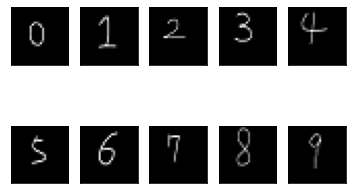

In [594]:
drawImg(train_imgs, 10, 2, 5)

In [602]:
model = models.Sequential([
    layers.Conv2D(16, (5,5), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(36, (5,5), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),
])

In [603]:
model.compile(optimizer='adam',loss=losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.fit(train_imgs, train_labels, epochs=300, verbose=0)
test_loss, test_acc = model.evaluate(train_imgs,  train_labels)

1/1 [==============================] - 0s 1ms/step - loss: 1.4692 - accuracy: 1.0000


In [597]:
np.argmax(model.predict(train_imgs), axis=-1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)